## Machine Learning in Practice trials

In [1]:
import pandas as pd
import numpy as np

from numpy import genfromtxt

# Takes a path to a directory and opens returns the train and test set in that directory as a pandas dataframe.
def mnist_to_csv(path):
	train = pd.read_csv(path + 'train.csv')
	y = train.ix[:,0].values
	train = train.drop('label',1).values
	test = pd.read_csv(path + 'test.csv').values
	return [train, y, test]

# Takes a path to a directory and opens returns the train and test set in that directory as a numpy array.
def mnist_to_nparray(path):
	[train, y, test] = mnist_to_csv(path)
	train = train.values
	y = y.values
	test = test.values
	return [train, y, test]
	
# Takes list of 28000 predictions and writes them to csv file ready for submission to Kaggle.
def write_results(res, path=''):
	results = pd.DataFrame({'ImageId':range(1,28001), 'Label':res})
	results.to_csv(path + 'results.csv', index=False)
	
# Takes list of categorical values and converts it to Kaggle compatible list.
def categorical_to_class(cat):
	classes = []
	for c in cat:
		classes.append(np.argmax(c))
	return classes
	



In [2]:
trainxp, trainyp, testset = mnist_to_csv("data\\")

separationIndex = int( len(trainxp)*0.1)
trainx = trainxp[separationIndex:len(trainxp)]
testx = trainxp[0:separationIndex-1]
trainy = trainyp[separationIndex:len(trainxp)]
testy = trainyp[0:separationIndex-1]



C:\Users\Eireen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [3]:
#temporary noise toolkit
import copy
from random import random, seed, randint
def add_noisy_pixels(x, p, rseed=-1):
	newx = copy.copy(x)
	if rseed != -1:
		seed(rseed)
	for i in range(0,len(x)):
		for j in range(0, len(x[0])):
			if random() < p:
				newx[i][j] = randint(0,255)
	return newx

In [4]:
#import toolkit.noise
#import random
testx_noisy_pixels = add_noisy_pixels(testx, 0.6, 1)
trainx_noisy_pixels = add_noisy_pixels(trainx, 0.6, 2)



In [5]:
print(testset.shape)
testset_sq = np.reshape(testset,(len(testset),28,28,1))

testset_noisy_sq = np.reshape(add_noisy_pixels(testset, 0.6, 3),(len(testset),28,28,1))

(28000, 784)


In [8]:
trainx_sq = np.reshape(trainx,(len(trainx), 28, 28,1))
testx_sq = np.reshape(testx,(len(testx),28,28,1))
testx_sq_noisy = np.reshape(testx_noisy_pixels,(len(testx),28,28,1))
trainx_sq_noisy = np.reshape(trainx_noisy_pixels,(len(trainx),28,28,1))

1


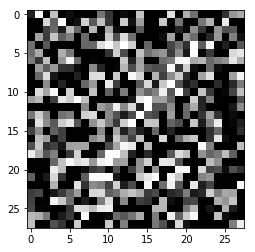

0


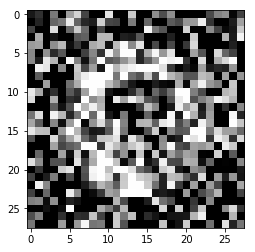

1


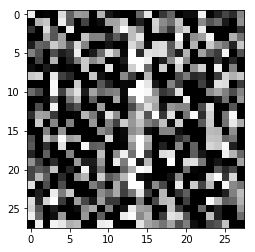

In [9]:
import matplotlib
import matplotlib.pyplot as plot
#plot test

for i in range(0,3):
    print(testy[i])
    plot.imshow(np.reshape(testx_sq_noisy, (len(testx), 28,28)) [i], cmap='gray')
    plot.show()


In [10]:
from skimage.filters import gabor_kernel
from skimage import io
from matplotlib import pyplot as pltk
import scipy

def extract_features(img): 
    imgsq = np.reshape(img,(28,28))
    imgblurred = scipy.ndimage.filters.gaussian_filter(imgsq, 1.3)
    features = [imgblurred]
    #gabor filter
    thetas = [0, 0.3, 0.6, 0.9, 1.2, 1.6, -0.3, -0.6]
   # thetas = [0, 0.6, 1.6, -0.6]
    
    for t in thetas:
        kernel = np.real(gabor_kernel(0.4, t))
        conv = scipy.signal.fftconvolve(imgblurred, kernel, mode='same')
        
        features.append(conv)
        
    #features.append(imgblurred)
    return features

        #normalisation idea: extract lines, sort by orientation, save length, normalize length to height of shape/ longest line
    
    #gabor filter wil react on lines that are not necessarily matching in direction. Maybe compute all gabors, 
    #sort by strongest reaction
    
    #use (inverse) gaussian for circle detection??????



C:\Users\Eireen\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\Users\Eireen\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


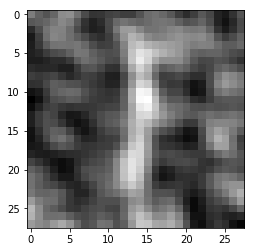

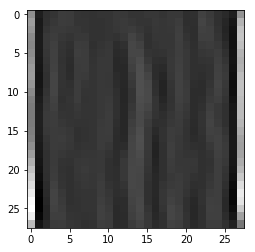

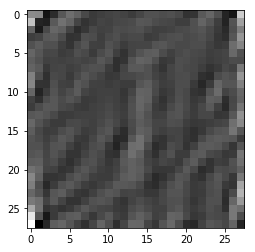

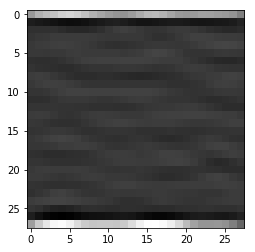

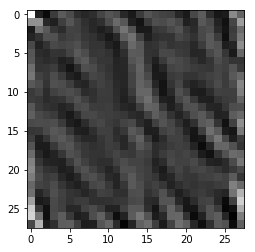

In [10]:
test = extract_features(testx_noisy_pixels[2])

for each in test:
    plot.imshow(each, cmap='gray')
    plot.show()

In [11]:
feature_train = [extract_features(x) for x in trainx_noisy_pixels]
feature_test = [extract_features(x) for x in testx_noisy_pixels]

C:\Users\Eireen\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\Users\Eireen\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [12]:
feature_train_n = [extract_features(x) for x in trainx_sq]
feature_test_n = [extract_features(x) for x in testx_sq]

C:\Users\Eireen\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\Users\Eireen\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


### Neural Network

In [13]:
import tensorflow as tf
import keras
#feature_train = [extract_features(x) for x in trainx_noisy_pixels]
#feature_test = [extract_features(x) for x in testx_noisy_pixels]


from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten



C:\Users\Eireen\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:

def build_neural_network(data_size, n_classes):
    #convolution
    network = Sequential()
    network.add(Conv2D(20, (5,5), input_shape = data_size))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    
    network.add(Dropout(0.25))
    
    network.add(Conv2D(20, (5,5)))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    
    network.add(Dropout(0.25))
    
    network.add(Flatten())
    
    network.add(Dense(20))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    
    
    
    
    network.add(Dense(n_classes, activation='softmax'))
    
    
    
    return network


def build_neural_network_no_conv(data_size, n_classes):
    #convolution
    network = Sequential()
    
   # network.add(Dense(20, input_shape = data_size))
   # network.add(BatchNormalization())
   # network.add(Activation('relu'))
    
    
    network.add(Dropout(0.25, input_shape = data_size))
    
    network.add(Flatten())
    
    network.add(Dense(20))
    network.add(BatchNormalization())
    network.add(Activation('relu'))
    
    
    
    
    network.add(Dense(n_classes, activation='softmax'))
    
    
    
    return network





In [28]:
#network=build_neural_network_no_conv((9,28,28), 10)
#network=build_neural_network_no_conv((28,28,1), 10)
# build neural network object
#network=build_neural_network([5*28*28], 10)
#network=build_neural_network((37800, 5, 28, 28), 10)
network=build_neural_network((28, 28,1), 10)

In [29]:
from keras import optimizers

loss = "categorical_crossentropy" 
sgd = optimizers.SGD(lr=0.7) 
metrics = ['accuracy'] 

network.compile(loss=loss, optimizer=sgd, metrics=metrics)
network.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 20)        520       
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 20)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 20)        10020     
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 20, 20)        80        
_________________________________________________________________
activation_5 (Activation)    (None, 20, 20, 20)        0         
__________

In [30]:
trainy_vector = keras.utils.to_categorical(trainy, num_classes = 10)
testy_vector = keras.utils.to_categorical(testy, num_classes = 10)



In [31]:
#scores=network.evaluate(np.reshape(np.array(feature_train), (len(feature_train), 5*28*28)), trainy_vector, batch_size=1)
#scores= network.evaluate(np.array(trainx_sq_noisy), trainy_vector, batch_size=128)
#scores= network.evaluate(np.array(feature_train_n), trainy_vector, batch_size=128)
scores= network.evaluate(np.array(trainx_sq), trainy_vector, batch_size=128)
val_loss=scores[0]
val_acc=scores[1]
print(val_loss)
print(val_acc)

37800/37800 [==============================] - 138s 4ms/step
13.702671273246644
0.06674603174760858


In [31]:
print(trainx_sq_noisy.shape)
print(len(feature_train[0])) # 37800 x 5 x 28 x 28
#print(np.array(feature_train).shape)
#trainy_vector.shape
#testx_sq_noisy.shape

(37800, 28, 28, 1)
5


In [34]:
#training

epochs = 20


for i in range(0, epochs):
    print(10+i)
    #results = nnetwork.fit(np.array(trainx_sq_noisy), trainy_vector, batch_size=30)
    results = network.fit(np.array(trainx_sq), trainy_vector, batch_size=30)
    print("train accuracy: ")
    print(results.history['acc'])
    scores = network.evaluate(np.array(testx_sq), testy_vector)
    #    scores = nnetwork.evaluate(np.array(testx_sq_noisy), testy_vector)
    print('test accuracy: ')
    print(scores[1])
                              
    



10
Epoch 1/1
37800/37800 [==============================] - 350s 9ms/step - loss: 0.1707 - acc: 0.9477
train accuracy: 
[0.9476719470960754]
4199/4199 [==============================] - 16s 4ms/step
test accuracy: 
0.9711836151464635
11
Epoch 1/1
37800/37800 [==============================] - 350s 9ms/step - loss: 0.0754 - acc: 0.9765
train accuracy: 
[0.9764550174985613]
4199/4199 [==============================] - 15s 4ms/step
test accuracy: 
0.9871397951893308
12
Epoch 1/1
37800/37800 [==============================] - 345s 9ms/step - loss: 0.0579 - acc: 0.9816
train accuracy: 
[0.9815608380805878]
4199/4199 [==============================] - 15s 4ms/step
test accuracy: 
0.9878542510121457
13
Epoch 1/1
37800/37800 [==============================] - 349s 9ms/step - loss: 0.0502 - acc: 0.9845
train accuracy: 
[0.9844973461495505]
4199/4199 [==============================] - 15s 4ms/step
test accuracy: 
0.9892831626577756
14
Epoch 1/1
37800/37800 [==============================] - 349s

In [ ]:

#thanks joan

def write_results(res, path='', name=''):
    results = pd.DataFrame({'ImageId':range(1,28001), 'Label':res})
    if name == '':
        name = 'results'
    results.to_csv(path + name + '.csv', index=False)
    
predictions = nnetwork.predict(testset_noisy_sq)

output_name = input('Enter name for outputfile\n')
print('Writing results to .csv file')
write_results(categorical_to_class(predictions), 'results/', output_name)

